In [1]:
# Import
import utils as ut
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm  # Colormaps
from matplotlib.colors import LogNorm  # Log colormaps
import datetime as DT
import pandas as pd
import math
import scipy
from IPython.core.debugger import Tracer

from sklearn import datasets, linear_model
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.svm import SVC, SVR
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
#from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

%matplotlib inline
import seaborn as sns; sns.set()
import operator
import itertools
import matplotlib.patches as mpatches
from scipy.stats.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')
#Tracer()()

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
#formatting
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [22]:
#filename = './data/international-airline-passengers.csv'
filename = './data/futs_us.csv'


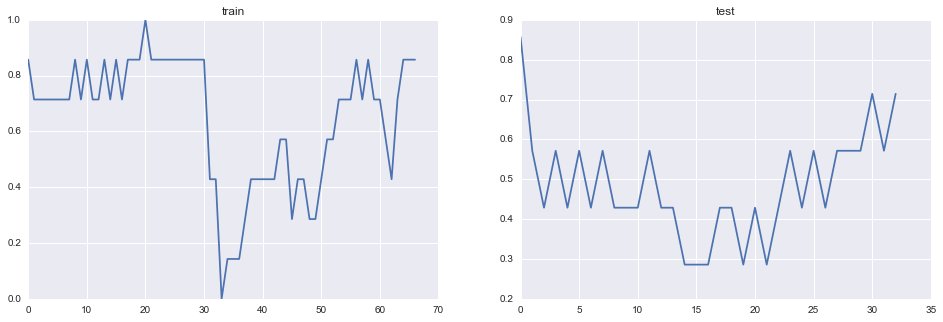

In [37]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv(filename, usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
limit = 100
dataset = dataset[:limit]

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#trainX
ut.figurefullwidth()
ut.subplot(1)
ut.subplottitle(1,"train")
plt.plot(train)
ut.subplot(2)
ut.subplottitle(2,"test")
plt.plot(test)

Epoch 1/500
0s - loss: 0.3931
Epoch 2/500
0s - loss: 0.2633
Epoch 3/500
0s - loss: 0.1640
Epoch 4/500
0s - loss: 0.0928
Epoch 5/500
0s - loss: 0.0519
Epoch 6/500
0s - loss: 0.0337
Epoch 7/500
0s - loss: 0.0281
Epoch 8/500
0s - loss: 0.0267
Epoch 9/500
0s - loss: 0.0260
Epoch 10/500
0s - loss: 0.0255
Epoch 11/500
0s - loss: 0.0250
Epoch 12/500
0s - loss: 0.0245
Epoch 13/500
0s - loss: 0.0244
Epoch 14/500
0s - loss: 0.0237
Epoch 15/500
0s - loss: 0.0231
Epoch 16/500
0s - loss: 0.0227
Epoch 17/500
0s - loss: 0.0223
Epoch 18/500
0s - loss: 0.0220
Epoch 19/500
0s - loss: 0.0215
Epoch 20/500
0s - loss: 0.0210
Epoch 21/500
0s - loss: 0.0207
Epoch 22/500
0s - loss: 0.0203
Epoch 23/500
0s - loss: 0.0199
Epoch 24/500
0s - loss: 0.0197
Epoch 25/500
0s - loss: 0.0192
Epoch 26/500
0s - loss: 0.0190
Epoch 27/500
0s - loss: 0.0187
Epoch 28/500
0s - loss: 0.0184
Epoch 29/500
0s - loss: 0.0182
Epoch 30/500
0s - loss: 0.0178
Epoch 31/500
0s - loss: 0.0176
Epoch 32/500
0s - loss: 0.0175
Epoch 33/500
0s -

Train Score: 0.01 RMSE
Test Score: 0.01 RMSE


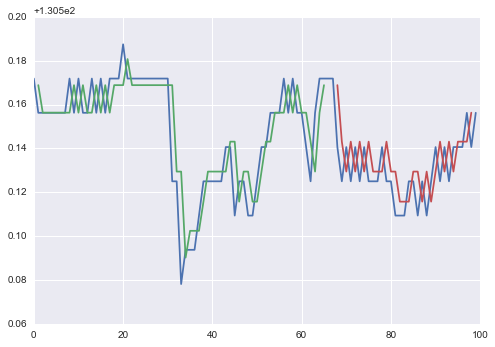

In [38]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=500, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [7]:
def calcmse (x, y):
    #Predictor comparison
    res = x - y
    res_e = np.sqrt(np.mean(res**2))
    #print(res_e)
    return res_e, res

Test Score: 0.0139 RMSE
Simple Score: 0.0132 RMSE
Train Score: 0.0136 RMSE


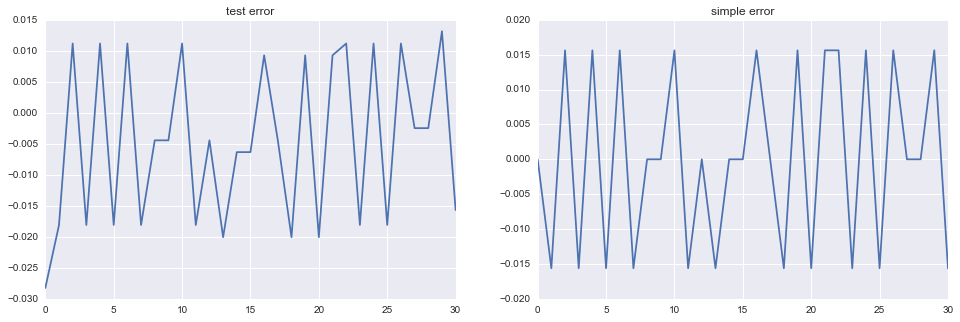

In [39]:
simpletestY = np.roll(testY[0],1)
simpletestY[0] = simpletestY[1]
#simpletestY

#testY[0]
#testPredict[:,0]
#trainY[0]
#trainPredict[:,0]
tr_e, tr_e_ar = calcmse(trainY[0], trainPredict[:,0])
te_e, te_e_ar = calcmse(testY[0], testPredict[:,0])
si_e, si_e_ar = calcmse(testY[0], simpletestY)

print ('Test Score: %.4f RMSE' % (te_e))
print ('Simple Score: %.4f RMSE' % (si_e))

print ('Train Score: %.4f RMSE' % (tr_e))

ut.figurefullwidth()
ut.subplot(1)
ut.subplottitle(1, "test error")
plt.plot(te_e_ar)
ut.subplot(2)
ut.subplottitle(2, "simple error")
plt.plot(si_e_ar)

